# Lab | Imbalanced data

#### 1. Load the dataset and explore the variables.

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import earthpy as et
import numpy as np

In [2]:
df = pd.read_csv (r'customer_churn.csv') # import file

#### -- explore dataframe --

In [3]:
df # view dataframe

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info() # checking for nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.duplicated(subset=None, keep='first') # checking for duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [6]:
df.drop(['customerID'], axis = 1, inplace = True) # dropping the customerID column to avoid issues

In [7]:
df_cat=df.select_dtypes(include=['object']) # creating a df with only objects

In [9]:
df_cat_enc=pd.get_dummies(df_cat,drop_first=True) # encoding all objects to numbers

In [10]:
df_cat_enc2=df_cat_enc['Churn_Yes']# creating new df with encoded churn

In [11]:
df_cat_enc2# checking encoding

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_Yes, Length: 7043, dtype: uint8

In [12]:
df_num=df.select_dtypes(exclude=['object']) # creating a df with only the columns that have numbers

In [13]:
df_num

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [14]:
df_comp=pd.concat([df_cat_enc2,df_num],axis=1) # creating a new df with all columns in number

In [15]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Churn_Yes       7043 non-null   uint8  
 1   SeniorCitizen   7043 non-null   int64  
 2   tenure          7043 non-null   int64  
 3   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2), uint8(1)
memory usage: 172.1 KB


In [16]:
df_comp.head()

,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges
0,0,0,1,29.85
1,0,0,34,56.95
2,1,0,2,53.85
3,0,0,45,42.30
4,1,0,2,70.70


#### 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

#### 3. Extract the target variable.

In [17]:
y=df_comp['Churn_Yes'] # creating y

In [18]:
X=df_num # creating X

In [19]:
y.shape # checking shape

(7043,)

In [20]:
X.shape# checking shape

(7043, 3)

#### 4. Extract the independent variables and scale them.

In [21]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df_num

scaledX = scale.fit_transform(X)

print(scaledX)

[[-0.43991649 -1.27744458 -1.16032292]
 [-0.43991649  0.06632742 -0.25962894]
 [-0.43991649 -1.23672422 -0.36266036]
 ...
 [-0.43991649 -0.87024095 -1.1686319 ]
 [ 2.27315869 -1.15528349  0.32033821]
 [-0.43991649  1.36937906  1.35896134]]


In [22]:
X.shape # checking if shape wasn´t changed by scaling

(7043, 3)

#### 5. Build the logistic regression model.

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logreg=LogisticRegression() # set up

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [27]:
clf=logreg.fit(X_train,y_train)

#### 6. Evaluate the model.

In [28]:
y_pred=clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [30]:
accuracy_score(y_test,y_pred)

0.7832465688594415

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

In [32]:
import matplotlib.pyplot as plt

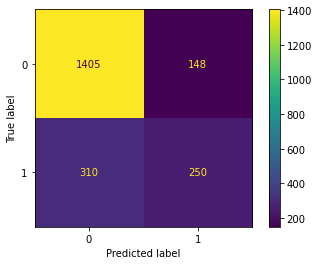

In [33]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [34]:
cmx=confusion_matrix(y_test,y_pred)

In [35]:
import seaborn as sns 

<AxesSubplot:>

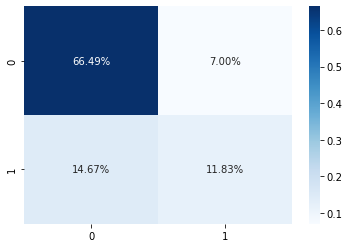

In [36]:
sns.heatmap(cmx/np.sum(cmx),annot=True, fmt='.2%',cmap='Blues')

#### 7. Even a simple model will give us more than 70% accuracy. Why?

- because the data is unbalanced 

#### 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest 
####     neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. 
####     Build and evaluate the logistic regression model. Is it there any improvement?

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
sm = SMOTE(random_state = 2)

In [39]:
X_smt, y_smt = sm.fit_sample(X, y.ravel())

In [40]:
y.shape

(7043,)

In [41]:
y.shape

(7043,)

In [42]:
y_smt.shape

(10348,)

In [43]:
X_smt.shape

(10348, 3)

In [44]:
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_smt, y_smt, test_size=0.3, random_state=40)

In [45]:
clf_smt=logreg.fit(X_train_smt,y_train_smt)

In [46]:
y_pred_smt=clf_smt.predict(X_test_smt)

In [47]:
accuracy_score(y_test_smt,y_pred_smt)

0.7256038647342995

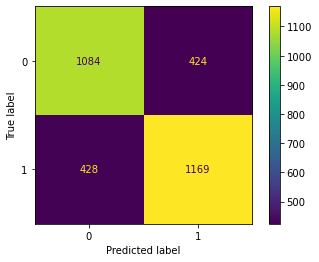

In [48]:
cm = confusion_matrix(y_test_smt, y_pred_smt, labels=clf_smt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_smt.classes_)
disp.plot()

#### 9. Tomek links are pairs of very close instances, but of opposite classes. 
#### Removing the instances of the majority class of each pair increases the space between the two classes, 
#### facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. 
#### Build and evaluate the logistic regression model. Is it there any improvement?

In [49]:
from imblearn.under_sampling import TomekLinks

In [50]:
tomek=TomekLinks()

In [51]:
X_tl,y_tl=tomek.fit_resample(X,y)

In [52]:
y.shape

(7043,)

In [53]:
y.value_counts()

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [54]:
y_tl.shape

(6581,)

In [55]:
X_tl.shape

(6581, 3)

In [56]:
y_tl.value_counts()

0    4712
1    1869
Name: Churn_Yes, dtype: int64

In [57]:
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(X_tl, y_tl, test_size=0.3, random_state=40)

In [58]:
clf_tl=logreg.fit(X_train_tl,y_train_tl)

In [59]:
y_pred_tl=clf_tl.predict(X_test_tl)

In [60]:
accuracy_score(y_test_tl,y_pred_tl)

0.7883544303797468

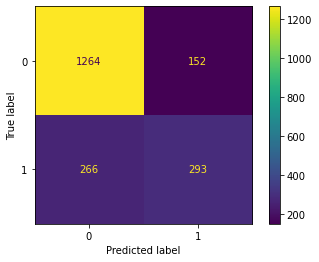

In [61]:
cm = confusion_matrix(y_test_tl, y_pred_tl, labels=clf_tl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_tl.classes_)
disp.plot()

#### 10. extra just because I wanted to try

In [62]:
# AUC area under the curve - useful for running multiple candidate models
from sklearn.metrics import roc_curve, roc_auc_score

In [63]:
import matplotlib.pyplot as plt 

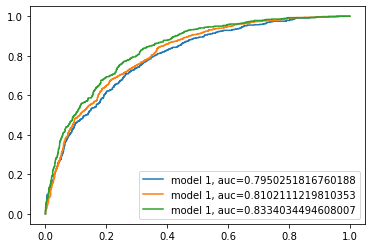

In [64]:
plt.figure(0).clf()

y_pred_probability=clf.predict_proba(X_test)[::,1]
fpr,tpr,_=roc_curve(y_test, y_pred_probability)
auc=roc_auc_score(y_test,y_pred_probability)
plt.plot(fpr,tpr,label='model 1, auc='+str(auc))
plt.legend(loc=4)


y_pred_probability=clf.predict_proba(X_test_smt)[::,1]
fpr,tpr,_=roc_curve(y_test_smt, y_pred_probability)
auc=roc_auc_score(y_test_smt,y_pred_probability)
plt.plot(fpr,tpr,label='model 1, auc='+str(auc))
plt.legend(loc=4)


y_pred_probability=clf.predict_proba(X_test_tl)[::,1]
fpr,tpr,_=roc_curve(y_test_tl, y_pred_probability)
auc=roc_auc_score(y_test_tl,y_pred_probability)
plt.plot(fpr,tpr,label='model 1, auc='+str(auc))
plt.legend(loc=4)
